# 손글씨 이미지 분류하기 - p.133

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

### 1. 데이터 준비

In [2]:
mnist = datasets.fetch_openml(name='mnist_784', data_home='./data/') # 사용하세요.
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
# 값의 범위가 0~256 
# 정규화 0~1사이로 만듬
mnist_data = mnist.data / 255

# column 784 --> 28*28
pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


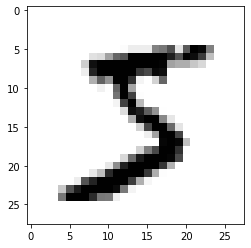

In [4]:
# 1번째 이미지 SAMPLING
plt.imshow(mnist_data[0].reshape(28, 28), cmap=cm.gray_r)
plt.show()

In [5]:
# column 784 --> 28*28
mnist_label = mnist.target
mnist_label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
train_size = 5000
test_size = 500

# 데이터 분리
train_X, test_X, train_y, test_y = model_selection.train_test_split(
    mnist_data, mnist_label, train_size=train_size,test_size=test_size)


In [7]:
# 2차원 배열화 28*28 (CNN 특징)
# p.134 추가.
train_X = train_X.reshape((len(train_X), 1, 28, 28))
test_X = test_X.reshape((len(test_X), 1, 28, 28))

### 2．텐서 생성 - p.134

In [8]:
train_y.dtype

dtype('O')

In [9]:
# int화
import numpy as np
train_y = train_y.astype(np.int32)
test_y = test_y.astype(np.int32)

In [10]:
# tensor 화
train_X = torch.from_numpy(train_X).float()
train_y = torch.from_numpy(train_y).long()

In [11]:
# tensor 화
test_X = torch.from_numpy(test_X).float()
test_y = torch.from_numpy(test_y).long()

In [12]:
print(train_X.shape)
print(train_y.shape)

torch.Size([5000, 1, 28, 28])
torch.Size([5000])


In [13]:
train_X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [14]:
# train (train_X + train_y)
train = TensorDataset(train_X, train_y)

# 데이터 체크
print(train[0])

# 미니배치 분할 (DataLoader -> batch분할)
train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.1843, 0.9137, 0.9922, 0.9922

### 3. 신경망 구성

In [15]:
# Net 모듈
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Convolutin 층 (합성곱)
        # Conv2d(입력 개수, 출력 개수, 필터 크기)
        # 1: gray scale의 채널수 : 1
        self.conv1 = nn.Conv2d(1, 6, 5, stride=1) # 제로 패딩 없음
        self.conv2 = nn.Conv2d(6, 16, 5, stride=1) # 제로 패딩 없음

        # Fully connected
        # 256 = (((28-5+1)/2 )-5+1)/2 * 
        #       (((28-5+1)/2 )-5+1)/2 * 16
        self.fc1 = nn.Linear(256, 64) 
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
        # 풀링층
        # 풀링 영역 크기
        # max_pool2d() 2d 이미지 pooling(max)
        # max_pool2d(size, stride=None, padding=0) # 제로 패딩 없음
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        
        x = x.view(-1, 256) # resize 
        
        x = F.relu(self.fc1(x))
        
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)
    
# 인스턴스 생성
model = Net()

### 5．모형 학습

In [16]:
# cosnt function
criterion = nn.CrossEntropyLoss()

# GD 
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Learn
for epoch in range(1000):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        # grad 초기화
        optimizer.zero_grad()
        
        # forward
        output = model(train_x)
        # cost calculator
        loss = criterion(output, train_y)

        # backward
        loss.backward()
        
        # step for weight
        optimizer.step()
        
        # loss about train 1set(all of batch)
        total_loss += loss.item()
    
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

100 3.015432106330991
200 0.6108170836232603
300 0.18669042258989066
400 0.09560189032345079
500 0.059669815527740866
600 0.04194156614539679
700 0.0318843610730255
800 0.02527152565016877
900 0.020865931903244928
1000 0.01759177639905829


In [ ]:
dir(model(test_X))

In [ ]:
torch.max(torch.exp(model(test_X).data),1)

In [ ]:
torch.max(model(test_X).data,1)

In [ ]:
torch.exp(model(test_X).data)
torch.max(model(test_X).data,1)[1]

In [ ]:
test_y

In [ ]:
result = torch.max(model(test_X).data, 1)[1]
accuracy = sum(test_y.data.numpy() \
               == result.numpy()) / len(test_y.data.numpy())

accuracy